<a href="https://colab.research.google.com/github/kimheeseo/python/blob/main/mandelbrot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize # color map 조각을 위해 필요
from numba import jit # 계산시간 단축을 위해 필요
import time # 계산시간을 보기 위해 필요

In [58]:
t0=time.time()

In [59]:
@jit  # Numba의 Just-In-Time 컴파일
def mandelbrot(c_real, c_imag, n_max):
    # 직접 meshgrid 구현
    rows = len(c_imag)
    cols = len(c_real)
    Re = np.empty((rows, cols))
    Im = np.empty((rows, cols))
    for i in range(rows):
        for j in range(cols):
            Re[i, j] = c_real[j]
            Im[i, j] = c_imag[i]

    n_grid = Re.size  # 총 조합 수
    z = np.zeros(n_grid)  # 결과 저장용 배열

    # 평탄화(flatten)된 형태로 순회
    Re_flat = Re.ravel()
    Im_flat = Im.ravel()

    for i in range(n_grid):
        c = complex(Re_flat[i], Im_flat[i])  # 복소수 c 정의
        n = 0
        z0 = complex(0, 0)

        # z0가 발산하거나 최대 반복 n_max까지
        while np.abs(z0) < np.inf and n != n_max:
            z0 = z0**2 + c
            n += 1

        # 결과 저장
        if n == n_max:
            z[i] = 0
        else:
            z[i] = n

        # 계산 진행 상황 출력
        if i % 100000 == 0 and i > 0:
            print(i, n_grid, (i / n_grid) * 100)

    # 2D 형태로 복원
    z = np.reshape(z, Re.shape)
    z = z[::-1]  # 상하 반전
    return z

In [60]:
  # 수평방향 h(실수부 Re)와 수직방향 v(허수부 Im)의 범위를 정합
  h1=-2 # 망델브로 집합 전체를 보여줌
  h2=0.5
  v1=-1.2
  v2=1.2

In [61]:
# 분해능 설정: resolution
resolution = 4000

In [62]:
# 실수부와 허수부의 축 데이터 배열 및 최대 반복 횟수를 설정
c_real=np.linspace(h1, h2, resolution)
c_imag=np.linspace(v1, v2, resolution)
n_max=100

In [63]:
# 함수를 실행하여 이미지를 획득
z=mandelbrot(c_real, c_imag, n_max)

t1=time.time()
print('calculation time = ', float(t1-t0), '[s]')

100000 16000000 0.625
200000 16000000 1.25
300000 16000000 1.875
400000 16000000 2.5
500000 16000000 3.125
600000 16000000 3.75
700000 16000000 4.375
800000 16000000 5.0
900000 16000000 5.625
1000000 16000000 6.25
1100000 16000000 6.875000000000001
1200000 16000000 7.5
1300000 16000000 8.125
1400000 16000000 8.75
1500000 16000000 9.375
1600000 16000000 10.0
1700000 16000000 10.625
1800000 16000000 11.25
1900000 16000000 11.875
2000000 16000000 12.5
2100000 16000000 13.125
2200000 16000000 13.750000000000002
2300000 16000000 14.374999999999998
2400000 16000000 15.0
2500000 16000000 15.625
2600000 16000000 16.25
2700000 16000000 16.875
2800000 16000000 17.5
2900000 16000000 18.125
3000000 16000000 18.75
3100000 16000000 19.375
3200000 16000000 20.0
3300000 16000000 20.625
3400000 16000000 21.25
3500000 16000000 21.875
3600000 16000000 22.5
3700000 16000000 23.125
3800000 16000000 23.75
3900000 16000000 24.375
4000000 16000000 25.0
4100000 16000000 25.624999999999996
4200000 16000000 26.2

**그래프 출력**

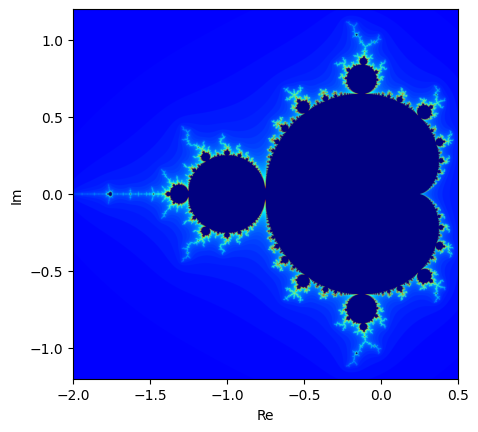

In [64]:
fig=plt.figure()
ax1=fig.add_subplot(111)
ax1.set_xlabel('Re')
ax1.set_ylabel('Im')

mappable=ax1.imshow(z,cmap='jet', norm=Normalize(vmin=0, vmax=n_max), extent=[h1, h2, v1, v2])

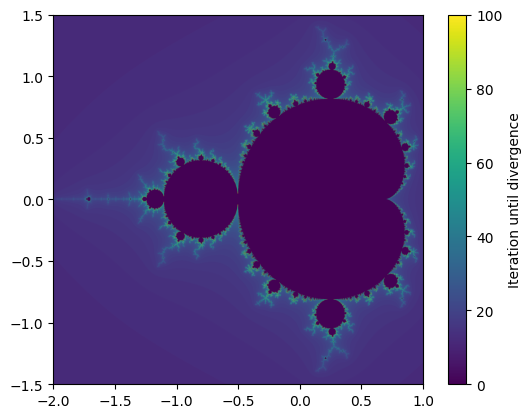

In [68]:
# 플롯
fig, ax1 = plt.subplots()
mappable = ax1.imshow(z, extent=[-2, 1, -1.5, 1.5])

# 컬러바 추가
cbar = plt.colorbar(mappable=mappable, ax=ax1)
cbar.set_label('Iteration until divergence')

# colormap 범위 설정은 mappable에
mappable.set_clim(0, n_max)

plt.show()

**그래프 출력: zoom up (1)**

In [71]:
h1=-1.8
h2=-1.6
v1=-0.1
v2=0.1

In [72]:
# 실수부와 허수부의 축 데이터 배열 및 최대 반복 횟수를 설정
c_real=np.linspace(h1, h2, resolution)
c_imag=np.linspace(v1, v2, resolution)
n_max=100

# 함수를 실행하여 이미지를 획득
z=mandelbrot(c_real, c_imag, n_max)

t1=time.time()
print('calculation time = ', float(t1-t0), '[s]')

100000 16000000 0.625
200000 16000000 1.25
300000 16000000 1.875
400000 16000000 2.5
500000 16000000 3.125
600000 16000000 3.75
700000 16000000 4.375
800000 16000000 5.0
900000 16000000 5.625
1000000 16000000 6.25
1100000 16000000 6.875000000000001
1200000 16000000 7.5
1300000 16000000 8.125
1400000 16000000 8.75
1500000 16000000 9.375
1600000 16000000 10.0
1700000 16000000 10.625
1800000 16000000 11.25
1900000 16000000 11.875
2000000 16000000 12.5
2100000 16000000 13.125
2200000 16000000 13.750000000000002
2300000 16000000 14.374999999999998
2400000 16000000 15.0
2500000 16000000 15.625
2600000 16000000 16.25
2700000 16000000 16.875
2800000 16000000 17.5
2900000 16000000 18.125
3000000 16000000 18.75
3100000 16000000 19.375
3200000 16000000 20.0
3300000 16000000 20.625
3400000 16000000 21.25
3500000 16000000 21.875
3600000 16000000 22.5
3700000 16000000 23.125
3800000 16000000 23.75
3900000 16000000 24.375
4000000 16000000 25.0
4100000 16000000 25.624999999999996
4200000 16000000 26.2

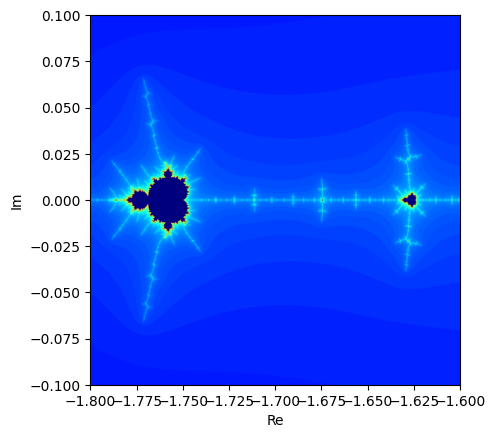

In [73]:
fig=plt.figure()
ax1=fig.add_subplot(111)
ax1.set_xlabel('Re')
ax1.set_ylabel('Im')

mappable=ax1.imshow(z,cmap='jet', norm=Normalize(vmin=0, vmax=n_max), extent=[h1, h2, v1, v2])

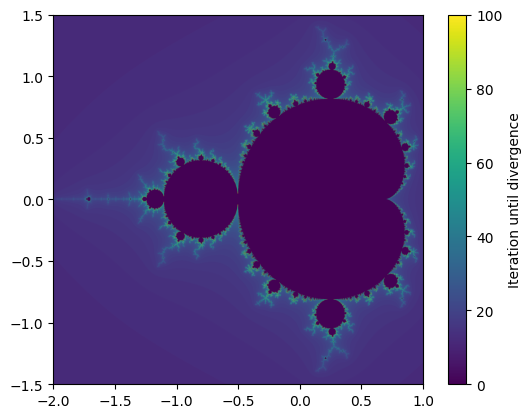

In [70]:
# 플롯
fig, ax1 = plt.subplots()
mappable = ax1.imshow(z, extent=[-2, 1, -1.5, 1.5])

# 컬러바 추가
cbar = plt.colorbar(mappable=mappable, ax=ax1)
cbar.set_label('Iteration until divergence')

# colormap 범위 설정은 mappable에
mappable.set_clim(0, n_max)

plt.show()

**그래프 출력: zoom up (2)**

In [74]:
h1=-1.78373
h2=-1.77685
v1=-0.00334008
v2=0.0040149

In [75]:
# 실수부와 허수부의 축 데이터 배열 및 최대 반복 횟수를 설정
c_real=np.linspace(h1, h2, resolution)
c_imag=np.linspace(v1, v2, resolution)
n_max=100

# 함수를 실행하여 이미지를 획득
z=mandelbrot(c_real, c_imag, n_max)

t1=time.time()
print('calculation time = ', float(t1-t0), '[s]')

100000 16000000 0.625
200000 16000000 1.25
300000 16000000 1.875
400000 16000000 2.5
500000 16000000 3.125
600000 16000000 3.75
700000 16000000 4.375
800000 16000000 5.0
900000 16000000 5.625
1000000 16000000 6.25
1100000 16000000 6.875000000000001
1200000 16000000 7.5
1300000 16000000 8.125
1400000 16000000 8.75
1500000 16000000 9.375
1600000 16000000 10.0
1700000 16000000 10.625
1800000 16000000 11.25
1900000 16000000 11.875
2000000 16000000 12.5
2100000 16000000 13.125
2200000 16000000 13.750000000000002
2300000 16000000 14.374999999999998
2400000 16000000 15.0
2500000 16000000 15.625
2600000 16000000 16.25
2700000 16000000 16.875
2800000 16000000 17.5
2900000 16000000 18.125
3000000 16000000 18.75
3100000 16000000 19.375
3200000 16000000 20.0
3300000 16000000 20.625
3400000 16000000 21.25
3500000 16000000 21.875
3600000 16000000 22.5
3700000 16000000 23.125
3800000 16000000 23.75
3900000 16000000 24.375
4000000 16000000 25.0
4100000 16000000 25.624999999999996
4200000 16000000 26.2

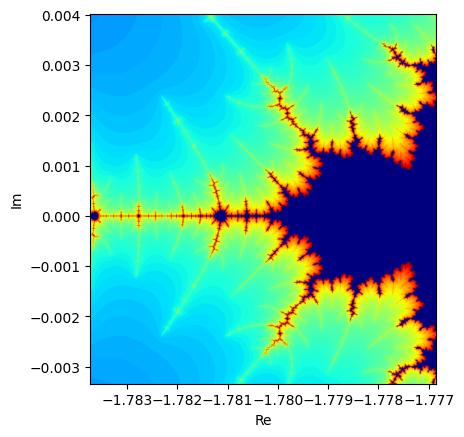

In [76]:
fig=plt.figure()
ax1=fig.add_subplot(111)
ax1.set_xlabel('Re')
ax1.set_ylabel('Im')

mappable=ax1.imshow(z,cmap='jet', norm=Normalize(vmin=0, vmax=n_max), extent=[h1, h2, v1, v2])

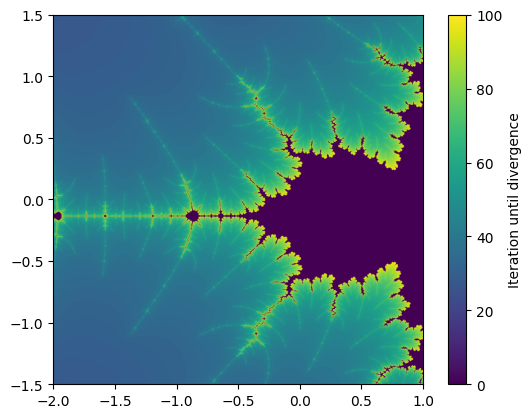

In [77]:
# 플롯
fig, ax1 = plt.subplots()
mappable = ax1.imshow(z, extent=[-2, 1, -1.5, 1.5])

# 컬러바 추가
cbar = plt.colorbar(mappable=mappable, ax=ax1)
cbar.set_label('Iteration until divergence')

# colormap 범위 설정은 mappable에
mappable.set_clim(0, n_max)

plt.show()